# Creative Machine Learning - Deep learning

### Author: Philippe Esling (esling@ircam.fr)

In this course we will cover
1. A brief introduction to [deep learning](#learning) and problems that we face
2. A formal presentation of [Auto-Encoders](#ae) (AEs)
3. An explanation of how to [implement AEs](#implement) and [layer-wise pretraining](#implement)
4. An [more modern application](#application) of AEs as generative models
4. An practical exemple of [convolutional denoising AEs](#denoising) for image data **(exercise)**

## Deep learning

Deep learning is currently the most successful subfield of machine learning that deals with algorithms inspired by the structure and function of the brain through artificial neural networks. It enables computers to learn from vast amounts of data and has revolutionized various fields such as computer vision, natural language processing and speech recognition.

## Why deep architectures?
Deep architectures are essential because they allow models to learn hierarchical representations from raw input data. These hierarchical representations can capture increasingly complex and abstract features as the network depth increases. This capability enables deep learning models to achieve state-of-the-art results in many tasks, as they can automatically learn to extract relevant features from the input data without relying on hand-engineered features.

**References:** 
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). [Deep Learning](http://www.deeplearningbook.org). MIT Press.

## Challenges in deep architectures

As seen in the course, there are several impediments in learning deep architectures, namely
1. Vanishing gradient
2. Overfitting issues
3. Multiple local minima
4. Instability in the training
Here, we briefly discuss the two major problems, namely _vanishing gradient_ and _overfitting_.

#### Vanishing gradient
One of the main challenges in training deep architectures is the vanishing gradient problem. It occurs when gradients of the loss function with respect to the model parameters become too small as they backpropagate through the layers. This issue leads to slow convergence and poor performance, as the weights in the earlier layers do not get updated significantly during training.

#### Overfitting
Another challenge in deep learning is overfitting, where the model learns to perform well on the training data but fails to generalize to unseen data. Regularization techniques, such as L1 and L2 regularization, dropout, and weight decay, are used to prevent overfitting by adding constraints to the model or by making the training process more robust.

**References:**
- Pascanu, R., Mikolov, T., & Bengio, Y. (2013). [On the difficulty of training recurrent neural networks](https://proceedings.mlr.press/v28/pascanu13.html). In International conference on machine learning (pp. 1310-1318).
- Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). [Dropout: A simple way to prevent neural networks from overfitting](http://jmlr.org/papers/v15/srivastava14a.html). Journal of Machine Learning Research, 15(1), 1929-1958.

### Layer-wise Pretraining
To address the vanishing gradient problem and improve the training of deep architectures, layer-wise pretraining was proposed. In this approach, each layer of the deep architecture is pretrained independently, usually with unsupervised learning methods like autoencoders, before fine-tuning the entire network using supervised learning.

**References:**
- Hinton, G. E., Osindero, S., & Teh, Y. W. (2006). [A fast learning algorithm for deep belief nets](https://www.cs.toronto.edu/~hinton/absps/fastnc.pdf). Neural computation, 18(7), 1527-1554.
- Vincent, P., Larochelle, H., Bengio, Y., & Manzagol, P. A. (2008). [Extracting and composing robust features with denoising autoencoders](https://dl.acm.org/doi/10.1145/1390156.1390294). In Proceedings of the 25th international conference on Machine learning (pp. 1096-1103).


#### Autoencoders
_Autoencoders_ are unsupervised learning models that learn to reconstruct their input data. They consist of an encoder that maps the input data to a lower-dimensional representation and a decoder that reconstructs the input data from the lower-dimensional representation. Autoencoders can be used to learn useful features from the data and initialize the weights of a deep architecture during layer-wise pretraining. As we have seen, an interesting variant of autoencoders are _denoising autoencoders_ that learn to reconstruct the input data from a corrupted version of it. By learning to recover the original data from the corrupted version, denoising autoencoders can capture more robust and meaningful features. They can be used in layer-wise pretraining to improve the training of deep architectures further.

## A brief refresher in Pytorch

As we have seen previously, `Pytorch` is a Python-based scientific computing package targeted at deep learning, which provides a very large flexibility and easeness of use for GPU calculation. `Pytorch` is constructed around the concept of `Tensor`, which is very similar to `numpy.ndarray`, but can be seamlessly run on GPU. Here, we provide a more detailed refresher on concepts of `Pytorch`.

Here are some examples of different `Tensor` creation

In [1]:
import torch
# Create a 5 x 3 Tensor of zeros
x = torch.empty(5, 3)
# Create a 64 x 3 x 32 x 32 random Tensor
x = torch.rand(64, 3, 32, 32)
# Create a Tensor of zeros with _long_ type
x = torch.zeros(10, 10, dtype=torch.long)
# Construct a Tensor from the data
x = torch.tensor([5.5, 3])

or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [2]:
x = x.new_ones(8, 2, dtype=torch.double)      # new_* methods take in sizes
y = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x.size())
print(x.shape[0])
print(y.shape)

torch.Size([8, 2])
8
torch.Size([8, 2])


#### Arithmetic operations

Tensors provide access to a transparent library of arithmetic operations

In [3]:
x = torch.rand(8, 2)
y = torch.rand(8, 2)
z = torch.rand(2, 4)
# Equivalent additions
a = (x + y)
b = (torch.add(x, y))
# Add in place
x.add_(y)
# Put in target Tensor
result = torch.empty(8, 2)
torch.add(x, y, out=result)
# Element_wise multiplication
print(x * y)
# Matrix product
print(x @ z)

tensor([[0.4413, 0.0839],
        [0.9020, 0.0266],
        [0.0271, 0.0798],
        [0.6327, 0.7359],
        [0.1740, 0.1044],
        [0.2433, 0.9200],
        [0.0371, 0.7637],
        [0.4059, 1.0814]])
tensor([[0.0838, 1.1328, 1.2665, 0.7070],
        [0.1001, 1.0691, 0.9620, 0.6665],
        [0.0290, 0.4479, 0.5469, 0.2797],
        [0.1401, 1.7302, 1.8001, 1.0794],
        [0.0842, 1.0543, 1.1100, 0.6578],
        [0.0860, 1.3842, 1.7292, 0.8645],
        [0.1154, 1.5214, 1.6691, 0.9494],
        [0.1190, 1.5853, 1.7528, 0.9894]])


#### Slicing and resizing

You can slice tensors using the usual Python operators. For resizing and reshaping tensor, you can use ``torch.view`` or ``torch.reshape``

In [4]:
#print(x[:, 1])
import torch
x = torch.zeros(16, 32, 32)
x2 = torch.zeros(64, 32, 32)
y = x.view(-1, 32, 32)
y2 = x2.view(-1, 32, 32)
print(y.size())
print(y2.size())
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

z = torch.rand(4, 4)
z = z.view(-1, 2, 2, 2)
print(z.shape)

torch.Size([16, 32, 32])
torch.Size([64, 32, 32])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
torch.Size([2, 2, 2, 2])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [5]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([1.2332])
1.2332005500793457


Tensors have more than **100 operations**, including _transposing, indexing, slicing, mathematical operations, linear algebra, random numbers_, which are all described at [https://pytorch.org/docs/torch](https://pytorch.org/docs/torch)

#### Numpy bridge

Converting a Torch Tensor to a Numpy array and vice versa is extremely simple. Note that the Pytorch Tensor and Numpy array **will share their underlying memory locations** (if the Tensor is on CPU), and changing one will change the other.

In [6]:
a = torch.ones(5)
b = a.numpy()
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### Going GPU

Tensors can be moved onto any device using the ``.to`` method.

In [7]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([2.2332], device='cuda:0')
tensor([2.2332], dtype=torch.float64)


## Computation Graphs

The concept of a computation graph is essential to efficient deep learning programming, because it allows you to not have to write the back propagation gradients yourself. A computation graph is simply a specification of how your data is combined to give you the output (the forward pass). Since the graph totally specifies what parameters were involved with which operations, it contains enough information to compute derivatives. 

The fundamental flag ``requires_grad`` allows to specify which variables are going to need differentiation in all these operations. If ``requires_grad=True``, the Tensor object keeps track of how it was created.

In [8]:
# Tensor factory methods have a ``requires_grad`` flag
x = torch.tensor([1., 2., 3], requires_grad=True)
# With requires_grad=True, we can still do all the operations 
y = torch.tensor([4., 5., 6], requires_grad=True)
print(x)
z = x + y
out = z.mean(-1)
print(z)
# But z now knows something extra.
print(z.grad_fn)
out.backward()
print(y.grad)

tensor([1., 2., 3.], requires_grad=True)
tensor([5., 7., 9.], grad_fn=<AddBackward0>)
tensor([0.3333, 0.3333, 0.3333])


Therefore, `z` knows that it is the direct result of an addition. Furthermore, if we keep following z.grad_fn, we can even find back both `x` and `y`. But how does that help us compute a gradient?

In [9]:
# Lets sum up all the entries in z
s = z.sum()
print(s)
print(s.grad_fn)
print(z.grad_fn)
print(x.grad_fn)

tensor(21., grad_fn=<SumBackward0>)
None


So now, what is the derivative of this sum with respect to the first
component of x? In math, we want

\begin{align}\frac{\partial s}{\partial x_0}\end{align}



Well, s knows that it was created as a sum of the tensor z. z knows
that it was the sum x + y. So

\begin{align}s = \overbrace{x_0 + y_0}^\text{$z_0$} + \overbrace{x_1 + y_1}^\text{$z_1$} + \overbrace{x_2 + y_2}^\text{$z_2$}\end{align}

And so s contains enough information to determine that the derivative we want is 1. We can have Pytorch compute the gradient, and see that we were right:

**Note** : If you run this block multiple times, the gradient will increment. That is because Pytorch *accumulates* the gradient into the .grad property, since for many models this is very convenient.

In [14]:
# calling .backward() on any variable will run backprop, starting from it.
s.backward()
print(x.grad)

tensor([3.3333, 3.3333, 3.3333])


Understanding what is going on in the block below is crucial for being a
successful programmer in deep learning.




In [11]:
x = torch.randn(2, 2)
y = torch.randn(2, 2)
# By default, user created Tensors have ``requires_grad=False``
print(x.requires_grad, y.requires_grad)
z = x + y
# So you can't backprop through z
print(z.grad_fn)
# ``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
x = x.requires_grad_()
y = y.requires_grad_()
# z contains enough information to compute gradients, as we saw above
z = x + y
print(z.grad_fn)
# If any input to an operation has ``requires_grad=True``, so will the output
print(z.requires_grad)
# Now z has the computation history, which we can **detach**
new_z = z.detach()
# Which means that we have no gradient attached anymore
print(new_z.grad_fn)

False False
None
True
None


You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` by wrapping the code block in
``with torch.no_grad():``



In [12]:
print(x.requires_grad)
print((x ** 2).requires_grad)
with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False


## Defining networks 

Here, we briefly recall that in `PyTorch`, the `nn` package provides higher-level abstractions over raw computational graphs that are useful for building neural networks. The `nn` package defines a set of `Modules`, which are roughly equivalent to neural network layers. A `Module` receives input `Tensors` and computes output `Tensors`, but may also hold internal state such as `Tensors` containing learnable parameters. In the following example, we use the `nn` package to show how easy it is to instantiate a three-layer network

In [13]:
import torch
import torch.nn as nn
# Define the input dimensions
in_size = 1000
# Number of neurons in a layer
hidden_size = 100
# Output (target) dimension
output_size = 10
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    nn.Linear(in_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.Tanh(),
    nn.Linear(hidden_size, output_size),
    nn.Softmax()
)

As we have seen in the slides, we can as easily mix between pre-defined modules and arithmetic operations. Here, we will define our very own *residual* layer, and then combine them in a more complex network. To do so, we first define our own `ResidualLayer` (by subclassing `nn.Module`). This type of layer can now be combined inside a full network by simply using `nn.Sequential`.

In [14]:
class ResidualLayer(nn.Module):
    def __init__(self, dim, dim_res=32):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(dim, dim_res, 3, 1, 1),
            nn.ReLU(True),
            nn.Conv2d(dim_res, dim, 1),
            nn.ReLU(True)
        )

    def forward(self, x):
        # Perform main residual action
        return x + self.block(x)

model = nn.Sequential(
	ResidualLayer(64, 32),
	ResidualLayer(64, 32),
)

# Autoencoders and layer-wise training

Here, we discuss the implementation of a deep autoencoder using PyTorch, focusing on layer-wise training. Autoencoders are unsupervised learning models that can learn useful features from the input data. They consist of an encoder, which maps the input data to a lower-dimensional representation, and a decoder, which reconstructs the input data from the lower-dimensional representation. _Deep autoencoders_ are multi-layer autoencoders that can learn more abstract and complex features from the input data. To learn such models, _layer-wise training_ was historically used as a technique to help overcome the vanishing gradient problem and initializes the network with better weights, leading to improved performance. Hence, we aim to _pretrain each layer individually_ in an **unsupervised** manner, followed by fine-tuning the entire network with _supervised_ learning.

<a id="generative"></a>
## Types of learning

### Supervised refresher

Until now, we have mostly discussed models that are developed for _supervised_ and _discriminative_ tasks. To formalize this problem, we have a set of data $\{\mathbf{x}_{i}, \mathbf{y}_{i}\}_{i\in[1,n]}$, where the $\mathbf{x}_{i}$ and $\mathbf{y}_{i}$ are linked. Therefore, we want to approximate this relation through
\begin{equation}
    \mathbf{\hat{y}} = \mathcal{F}_\mathbf{\theta}(\mathbf{x})  
\end{equation}
where we train the parameters $\mathbf{\theta}$ so that $\mathbf{\hat{y}}\approx\mathbf{y}$. The existence of a label $\mathbf{y}$ ("correct answer") defines a _supervised_ problem

### Going unsupervised

In some cases, we might only have a set of data $\{\mathbf{x}_{i}\}_{i\in[1,n]}$, and still be interested in learning some underlying properties or structure of this set. In that case, the problem is _unsupervised_ as we have to learn without a given answer. 

Here, we can turn to _generative_ models [[1](#reference1)], which allows to create new data instances based on the observation of existing examples. Although these models are more naturally defined in a _probabilistic way_ (as we will see later when we dwelve in generative models), we will assume that we have some simple _code_ $\mathbf{z}$, which allows to control the properties of the generation, and need to learn
\begin{equation}
    \mathbf{\hat{x}} = \mathcal{F}_\mathbf{\theta}(\mathbf{z})  
\end{equation}
where we still need to learn $\mathbf{\theta}$, so that $\mathbf{\hat{x}}$ have similar properties to that of the examples in $\{\mathbf{x}_{i}\}_{i\in[1,n]}$.

<a id="ae"></a>

## Auto-encoders

One way to understand a set of data is to try to _compress_, or _simplify_ the corresponding dataset. So the idea is to learn simultaneously how to _encode_ our unlabeled input $\{\mathbf{x}_{i}\}_{i\in[1,n]}$ and to _decode_ the corresponding representation. This idea give rise to the notion of **auto-encoder**. 

### Architecture 

The auto-encoder is an unsupervised architecture originally proposed to perform _dimensionality reduction_ [[3](#reference3)]. As its name indicates, we will try to train this model to learn an efficient _encoding_ $\mathbf{z}$ of unlabeled input data $\mathbf{x}$. The only way to learn efficient parameters is to also learn a _decoding_ function to _reconstruct_ $\mathbf{x}$ from $\mathbf{z}$.

<img src="images/auto_encoder.png"/>

As shown here, a first model $\mathcal{E}_\phi$ _encodes_ the input into a _latent code_ $\mathbf{z}$ in order to provide a low-dimensional representation of the data. A second model $\mathcal{D}_\theta$ designated as the _decoder_ aims to generate outputs from $\mathbf{z}$ that are as close to the original inputs as possible.

### Formal definition

The latent code $\mathbf{z}$ can be seen as a compressed abstract representation, and may be used as an intermediate space for analysis or generation. This helps to govern the distribution of the data through a simpler and higher-level representation, while enhancing the _expressiveness_ of the generative model.
The behaviour of an auto-encoder can be formalized as:

$$
\begin{align}
\mathbf{z} &= \mathcal{E}_\phi(\mathbf{x}) \\
\mathbf{\hat{x}} &= \mathcal{D}_\theta(\mathbf{z})  
\end{align}
$$

with the _encoder_ $\mathcal{E}_\phi$ and _decoder_ $\mathcal{D}_\theta$ functions parameterized respectively by $\phi$ and $\theta$. As we can see this defines the reconstruction relationship
$$
    \mathbf{\hat{x}} = \mathcal{D}_\theta(\mathcal{E}_\phi(\mathbf{x}))  
$$

### Training

The training of an auto-encoder consists in finding the optimal functions of encoding $\mathcal{E}^*$ and decoding $\mathcal{D}^*$ by evaluating the \textit{reconstruction error} $\mathcal{L}$ between $\mathbf{x}$ and $\mathbf{\hat{x}}$, such that
\begin{equation}
    \mathcal{E}^*, \mathcal{D}^* = arg\,min_{ \phi, \theta}{\mathcal{L}}(\mathbf{x}, \mathcal{D}_\theta(\mathcal{E}_\phi(\mathbf{x})))
\end{equation}

As the latent space usually has a smaller dimensionality than the input, it acts as an incentive for the network to find the main attributes of variations in the dataset (and also explains its use for _dimensionality reduction_).

### Variants and discussion

There are several variants of auto-encoders, such as denoising auto-encoders or variational auto-encoders. Each address some downside of the basic AE model. For instance, the deterministic nature of the basic auto-encoder implies a point-wise mapping of the latent space, meaning that not all the latent positions can be leveraged to produce relevant reconstructions. Because of this reason, there is no way to ensure that the latent space could allow a robust generalization and that any random $\mathbf{z}$ would generate a meaningful output.

<a id="implement"> </a>

## Implementation

Here, we discuss how we can implement and train a simple auto-encoder network in Pytorch. As discussed earlier, an AE is composed of two parts, an **encoder** and a **decoder**. The goal of the encoder is to "compress" the dataset, representing its principal features with a very small code, while the goal of the decoder is to learn how to reproduce the initial input from this code. Hence, we will first need to use some basic imports and definition to setup our problem

### Import Pytorch and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
from cml.plot import initialize_bokeh
from cml.panel import initialize_panel
from jupyterthemes.stylefx import set_nb_theme
from bokeh.io import show
initialize_bokeh()
initialize_panel()
set_nb_theme("onedork")
rng = np.random.RandomState(1)

2023-06-02 18:53:14.280050: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 18:53:15.962992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/matte/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Loading BokehJS ...

### Load the dataset

To start with a pragmatic and simple to understand example, we  will try to train the basic AE using the Fashion MNIST dataset. This dataset contains images of size 28x28 pixels, with different pieces of clothing. The following code allows to load (and eventually download) the dataset, by using the `torchvision.datasets` module. We also plot some randomly selected test examples

In [2]:
import matplotlib
dataset_dir = './data'
# Going to use 80%/20% split for train/valid
valid_ratio = 0.2
# Load the dataset for the training/validation sets
train_valid_dataset = torchvision.datasets.FashionMNIST(root=dataset_dir, train=True, transform=torchvision.transforms.ToTensor(), download=True)
# Split it into training and validation sets
nb_train = int((1.0 - valid_ratio) * len(train_valid_dataset))
nb_valid =  int(valid_ratio * len(train_valid_dataset))
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])
# Load the test set
test_dataset = torchvision.datasets.FashionMNIST(root=dataset_dir, transform=torchvision.transforms.ToTensor(),train=False)
# Prepare 
num_threads = 4     # Loading the dataset is using 4 CPU threads
batch_size  = 128   # Using minibatches of 128 samples
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=num_threads)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False, num_workers=num_threads)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False,num_workers=num_threads)

Here, we are going to check the properties of our different sets and also plot some random examples, in order to better understand what type of data we will be working with.

The train set contains 48000 images, in 375 batches
The validation set contains 12000 images, in 94 batches
The test set contains 10000 images, in 79 batches


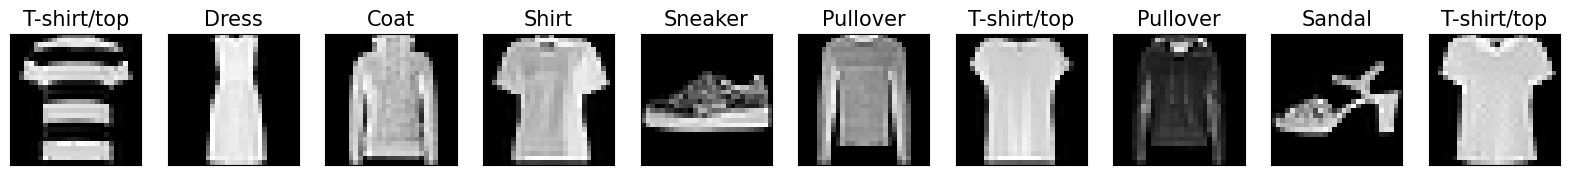

In [3]:
print("The train set contains {} images, in {} batches".format(len(train_loader.dataset), len(train_loader)))
print("The validation set contains {} images, in {} batches".format(len(valid_loader.dataset), len(valid_loader)))
print("The test set contains {} images, in {} batches".format(len(test_loader.dataset), len(test_loader)))
nsamples = 10
classes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']
imgs_test, labels = next(iter(train_loader))
fig = plt.figure(figsize=(20,5))
for i in range(nsamples):
    ax = plt.subplot(1,nsamples, i+1)
    plt.imshow(imgs_test[i, 0, :, :], vmin=0, vmax=1.0, cmap=matplotlib.cm.gray)
    ax.set_title("{}".format(classes_names[labels[i]]), fontsize=15)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

<a name="architecture"></a>

### Define the deep autoencoding architecture

First, we will define the deep autoencoder architecture as a guideline to what we are aiming to train by creating a custom nn.Module class. The autoencoder will have multiple hidden layers in both the encoder and decoder.

In [4]:
class DeepAutoencoder(nn.Module):
    def __init__(self):
        super(DeepAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

<a name="pretraining"></a>
### Layer-wise pretraining

In this section, we will perform layer-wise pretraining of the deep autoencoder. We will train each layer individually as a shallow autoencoder, with its own encoder and decoder.

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 1.1 - Implementing the **layer-wise pretraining**

> 1. Complete the `pretrain_layer` function that performs the pretraining of a given layer
>    * Define the architecture of a single autoencoder
>    * Create a criterion and optimizer
>    * **Obtain the encoded features from previously trained layers**
> 2. Update the training loop to learn the weights of both layers.

</div>

***

In [7]:
device = "cpu"

class ShallowAutoencoder(nn.Module):
    def __init__(self, din, dout):
        super(ShallowAutoencoder, self).__init__()
        # Encoder
        self.enc = nn.Sequential(
            nn.Linear(din, dout),
            nn.ReLU()
        )

        # Decoder
        self.dec = nn.Sequential(
            nn.Linear(dout, din),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.enc(x)
        x = self.dec(x)
        return x


# Function for layer-wise pretraining
def pretrain_layer(pretrained_layers, layer_id, layer_in, layer_out, train_loader, num_epochs=50):
    
    # Define the shallow autoencoder architecture
    #shallow_autoencoder = nn.Sequential(
    #    nn.Linear(layer_in, layer_out),
    #    nn.ReLU(),
    #    nn.Linear(layer_out, layer_in),
    #    nn.ReLU()
    #)
    shallow_autoencoder = ShallowAutoencoder(layer_in, layer_out)

    # Our training criterion and optimizer
    criterion = nn.MSELoss()
    lr = 0.001
    optimizer = torch.optim.SGD(shallow_autoencoder.parameters(), lr)
    
    # Training loop
    for epoch in range(num_epochs):
        for batch_features, _ in train_loader:                  # batch_features.shape: (batch_size, 1, 28, 28)
            
            x = torch.reshape(batch_features, (batch_size, 28*28))

            # Eventually pass the batch through our previous layers
            batch_encoded = ...
            for layer in pretrained_layers:
                batch_encoded = layer.enc(...)
            # Training loop for a given layer
            x_bar = shallow_autoencoder(x)
            loss = criterion(x_bar, x)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #print("\033[H\033[J", end="")
            
        # Print the corresponding advances
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    # Return the trained shallow autoencoder
    return shallow_autoencoder

# Pretrain each layer of the autoencoder
pretrained_layers = []
input_sizes = [28 * 28, 128, 128, 64, 64]
output_sizes = [128, 128, 64, 64, 32]
for i in range(len(input_sizes)):
    print(f"Pretraining layer {i+1}")
    pretrained_layer = pretrain_layer(pretrained_layers, i, input_sizes[i], output_sizes[i], train_loader)
    pretrained_layers.append(pretrained_layer)

Pretraining layer 1
Epoch [1/50], Loss: 0.1763
Epoch [2/50], Loss: 0.1738
Epoch [3/50], Loss: 0.1712
Epoch [4/50], Loss: 0.1685
Epoch [5/50], Loss: 0.1660


KeyboardInterrupt: 

<a name="finetuning"></a>
### Fine-tuning the Autoencoder

After layer-wise pretraining, we will fine-tune the entire deep autoencoder using the pretrained layers' weights. Note that what we have right now is a set of pretrained layers contained in the `pretrained_layers` array. However, we still need to connect these layers together by **transferring their weights to our full deep autoencoder architecture**.

If you check the documentation and code for the `nn.Linear` layer, you can see that the actual weights are stored inside two Tensors respectively named
- `layer.weight.data`
- `layer.bias.data`

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 1.2 - Finetuning the autoencoder

> 1. Transfer the weights from the pretrained layers to the full architecture
> 2. Fill in the training criterion and optimizer
> 2. Finish the training loop to finetune your deep AE
  
</div>

***

In [ ]:
# Initialize the deep autoencoder with pretrained weights
autoencoder = DeepAutoencoder().to(device)
# Load pretrained weights into the deep autoencoder
for i, layer in enumerate(autoencoder.encoder):
    if isinstance(layer, nn.Linear):
        ######################
        # YOUR CODE GOES HERE
        ######################
        layer.weight.data = ...
        layer.bias.data = ...

for i, layer in enumerate(autoencoder.decoder):
    if isinstance(layer, nn.Linear):
        ######################
        # YOUR CODE GOES HERE
        ######################

######################
# YOUR CODE GOES HERE
######################
# Fine-tune the deep autoencoder
criterion = ...
optimizer = ...
num_epochs = 100

for epoch in range(num_epochs):
    for batch_features, _ in train_loader:
        ######################
        # YOUR CODE GOES HERE
        ######################
        ...

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

<a name="visualization"></a>
### Visualizing the Results

First, we can visualize the results by comparing input images and their corresponding reconstructed images produced by the deep autoencoder.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def display_images(images, title):
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Display the input and reconstructed images
for batch_features, _ in test_loader:
    batch_features = batch_features.view(-1, 28 * 28).to(device)
    outputs = autoencoder(batch_features)
    input_images = batch_features.cpu().detach().numpy()
    reconstructed_images = outputs.cpu().detach().numpy()
    display_images(input_images, 'Input Images')
    display_images(reconstructed_images, 'Reconstructed Images')
    break

<a name="finetuning"></a>
### Using the encoder for supervised classification

The following question is entirely open, without any specific code guideline to follow. This is aimed at exercising your own problem-solving skills in order to define the code architecture by yourself. Now that we have a finetuned auto-encoder, we would like to use the _encoding_ part for _supervised classification_. As seen in class, this amounts to a form of _transfer learning_. Hence, we need to retrieve the encoder and add extra layers that we will train in a supervised manner (in order to recognize the class of different fashion items).

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 1.3 - Transfer learning for classification

> 1. Define the architecture of your target classifier
> 2. Transfer the weights from our finetuned encoder
> 3. Define the complete training of this classifier
> 4. Evaluate your solution
  
</div>

***

In [ ]:

######################
# YOUR CODE GOES HERE
######################


## Deep autoencoders using JAX

The following is an **optional exercise** in which you can try to implement the same mechanisms in JAX. To speed up the implementation, we propose to rely on the Flax library, which allows an easy definition of models.

### Setup and Dataset Preparation

First, we need to import the necessary JAX libraries. Note that we will reuse the same dataset as previously, but you will need to _cast the batches_ into a JAX-compliant format.

In [23]:
# Import libraries
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
import optax
import flax

<a name="architecture"></a>
### Autoencoder training

Next, we will define the deep autoencoder architecture using the Flax library in JAX.

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #192841; border-color: #779ecb">

> ### Exercice (optional)
>   1. Define your architecture using Flax.
>   2. Perform the layerwise pretraining
>   3. Transfer the weights to a deep architecture
>   4. Finetune and evaluate your model

</div>

***

In [25]:
import flax.linen as nn

# Encoder
class Encoder(nn.Module):
    
    @nn.compact
    def __call__(self, x):
        ######################
        # YOUR CODE GOES HERE
        ######################
        ...
        

# Encoder
class Decoder(nn.Module):
    
    @nn.compact
    def __call__(self, x):
        ######################
        # YOUR CODE GOES HERE
        ######################
        ...
        

# Autoencoder
class Autoencoder(nn.Module):
    
    @nn.compact
    def __call__(self, x):
        ######################
        # YOUR CODE GOES HERE
        ######################
        ...

######################
# YOUR CODE GOES HERE
######################
# Layerwise pretraining
...

# Model finetuning
...

# Model evaluation
...


Ellipsis

# Generative auto-encoder (modern version)

As seen in the course, the previous training version of AEs was used for several years, but several advances in **model regularization** now allows to bypass the need for layer-wise training and directly train deep version of the AEs. These advances are _batch normalization_, _ReLU_ activations and _Dropout_. Furthermore, by definition, the AE can already be seen as a form of _generative model_ (although it lacks a probabilistic definition). 

Therefore, we will define in the following a simple AE seen as a generative model, to directly learn how to compress and reconstruct images from simple small vectors. Hence, we will need an `encoder`, which compresses the images into a small latent vector, and a `decoder`, that reconstructs the original image from this code. Here, we will start very basic and define the encoder and decoder as simple `Linear` layers. Note that we also use `BatchNorm`, `ReLU` and `Dropout` to regularize our training.

In [6]:
class AE(nn.Module):
    def __init__(self, encoding_dim):
        super(AE, self).__init__()
        self.latent_dim = encoding_dim
        self.hidden_dim = 256
        self.encoder = nn.Sequential(
          nn.Linear(28 * 28, self.hidden_dim),
          nn.BatchNorm1d(self.hidden_dim), nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(self.hidden_dim, self.hidden_dim), 
          nn.BatchNorm1d(self.hidden_dim), nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(self.hidden_dim, self.latent_dim), nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
          nn.Linear(self.latent_dim, self.hidden_dim), 
          nn.BatchNorm1d(self.hidden_dim), nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(self.hidden_dim, self.hidden_dim), 
          nn.BatchNorm1d(self.hidden_dim), nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(self.hidden_dim, 28 * 28), nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x.reshape(-1, 28 * 28))
        decoded = self.decoder(encoded)
        return decoded.reshape(-1, 1, 28, 28)

Here we can see that the model depends on a given `encoding_dim` variable, which defines the size of the latent code. Therefore, we can instantiate our model arbitrarliy with `64` dimensions

In [7]:
latent_dim = 64   
model = AE(latent_dim) 

The only remaining part that we did not discuss yet is what type of _loss_ (defined as $\mathcal{L}$) we can use to train our model. First, we will simply rely on the _Mean Squared Error_ (MSE) loss, which is defined as
\begin{equation}
    \mathcal{L}_{MSE}(\hat{\mathbf{x}}, \mathbf{x}) = \mid \hat{\mathbf{x}}, \mathbf{x} \mid^{2}
\end{equation}

In [8]:
# Loss function that we will use
loss_fn = torch.nn.MSELoss(reduction='sum')

<a id="application"> </a>

### Training the model

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [9]:
# Learning rate
learning_rate = 1e-4
# Optimizer to fit the weights of the network
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for t in range(20):
    full_loss = torch.Tensor([0])
    # Forward pass: compute predicted y by passing x to the model.
    for i, (x, _) in enumerate(train_loader):
        y_pred = model(x)
        # Compute the loss.
        loss = loss_fn(y_pred, x)
        # Before the backward pass, zero all of the network gradients
        optimizer.zero_grad()
        # Backward pass: compute gradient of the loss with respect to parameters
        loss.backward()
        # Calling the step function to update the parameters
        optimizer.step()
    print(loss)

tensor(3343.1089, grad_fn=<MseLossBackward>)
tensor(3005.9805, grad_fn=<MseLossBackward>)
tensor(2812.6462, grad_fn=<MseLossBackward>)
tensor(2727.8533, grad_fn=<MseLossBackward>)
tensor(2595.9111, grad_fn=<MseLossBackward>)
tensor(2553.7651, grad_fn=<MseLossBackward>)
tensor(2544.0669, grad_fn=<MseLossBackward>)
tensor(2468.2820, grad_fn=<MseLossBackward>)
tensor(2400.9646, grad_fn=<MseLossBackward>)
tensor(2364.0288, grad_fn=<MseLossBackward>)
tensor(2379.8469, grad_fn=<MseLossBackward>)
tensor(2298.6030, grad_fn=<MseLossBackward>)
tensor(2324.0264, grad_fn=<MseLossBackward>)
tensor(2216.2561, grad_fn=<MseLossBackward>)
tensor(2306.3574, grad_fn=<MseLossBackward>)
tensor(2223.1157, grad_fn=<MseLossBackward>)
tensor(2159.7192, grad_fn=<MseLossBackward>)
tensor(2185.4272, grad_fn=<MseLossBackward>)
tensor(2213.2729, grad_fn=<MseLossBackward>)
tensor(2150.3906, grad_fn=<MseLossBackward>)


Now that the model is trained, we can test it by encoding and decoding images from the test set.

In [23]:
encoded_imgs = model.encoder(imgs_test.reshape(-1,28*28))
decoded_imgs = model.decoder(encoded_imgs).reshape(-1,28,28).detach().numpy()

#decoded_imgs = model(imgs_test)

By plotting the images, we can see that the model is able to perform an adequate (yet somewhat blurry) reconstruction of the input images. The interesting point is that this reconstruction comes from a code of only `64` dimensions, whereas the original images have `784` dimensions.

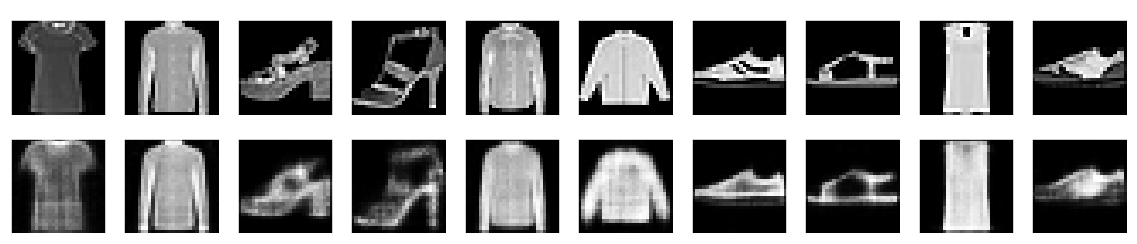

In [24]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imgs_test[i, 0])
    plt.title("original"); plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed"); plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Improvements

Even though this very basic example seems to work, several improvements can be made over the original model. First, we can see that the overall framework does not depend on the exact nature of the `encoder` and `decoder`. 

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #192841; border-color: #779ecb">

> ### Exercise (optional)
>   1. Rewrite the original class to accept any type of architecture for these (see code below). 
>   2. Fill the missing code to have a new AE model

</div>

***

In [26]:
class AE(nn.Module):
    def __init__(self, encoder, decoder, encoding_dim):
        super(AE, self).__init__()
        self.latent_dim = encoding_dim
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

######################
# YOUR CODE GOES HERE
######################

encoder = ...
decoder = ...
model = ...

Second, we only used the train dataset, whereas the use of a validation and test sets allows to ensure that we do not overfit our model.

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #192841; border-color: #779ecb">

> ### Exercise (optional)
>   1. Write a separate train function, that can be called on different sets
>   2. Re-write the training loop to test overfitting

</div>

***

In [12]:
######################
# YOUR CODE GOES HERE
######################

## **Optional** exercise: Denoising AE

Imagine (for the sake of argument), that we choose an encoding dimension which is of same dimensionality as the input one. Then, one huge problem is that nothing prevents the AE from simply learning the _identity_ function (try to imagine why). An autoencoder can also be trained to remove noise from images. This type of _regularization_ prevents the model from learning this degenerate situation.

In this exercise, you will need to create your own denoising AE, by relying on a noisy version of the Fashion MNIST dataset (adding random Gaussian noise to each image). You will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [11]:
class GaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

Here, we create two new train and test sets by adding random noise to the images

In [12]:
# Load the datasets and use our Gaussian noise transform
train_valid_dataset = torchvision.datasets.FashionMNIST(root=dataset_dir, train=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), GaussianNoise(0., 0.1)]), download=True)
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])
test_dataset = torchvision.datasets.FashionMNIST(root=dataset_dir, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), GaussianNoise(0., 0.1)]),train=False)
# Create loaders
train_loader_noisy = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=num_threads)
valid_loader_noisy = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False, num_workers=num_threads)
test_loader_noisy = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False,num_workers=num_threads)

Plot the noisy images.


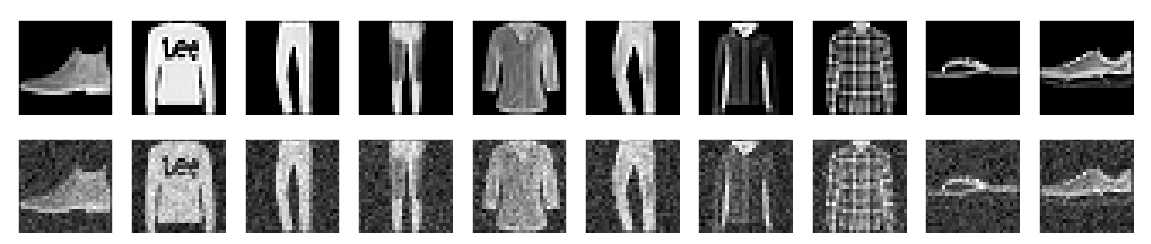

In [13]:
x_test, labels = next(iter(test_loader))
x_test_noisy, labels = next(iter(test_loader_noisy))
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(x_test[i].squeeze())
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
    ax = plt.subplot(2, n, i + 1 + n)
    plt.title("original + noise")
    plt.imshow(x_test_noisy[i].squeeze())
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [19]:
######################
# YOUR CODE GOES HERE
######################

class DenoisingAE(AE):
    def __init__(self):
        super(DenoisingAE, self).__init__()
        self.encoder = ...    
        self.decoder = ...
    
    def forward(self, x):
        encoded = ...
        decoded = ...
        return decoded

autoencoder = ...

Write down the full optimization loop to optimize your denoising auto-encoder

In [ ]:
######################
# YOUR CODE GOES HERE
######################

Plot both the noisy images and the denoised images produced by the autoencoder to check that your implementation is correct

In [32]:
######################
# YOUR CODE GOES HERE
######################
encoded_imgs = ...
decoded_imgs = ...
plt.figure(figsize=(20, 4))
for i in range(n):
    ...
plt.show()

<Figure size 1440x288 with 0 Axes>

# Attention layers and Transformers

In the following exercise, we aim to implement attention layers and Transformers in PyTorch. Transformers are a powerful deep learning architecture that has been used to achieve state-of-the-art results in various natural language processing tasks. 

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #410819; border-color: #cb2e47">

> **Warning on the exercise difficulty and goal**

> **Note that this exercise is a lot more involved, as we now move on to an almost research-level type of exercise, where we mostly provide a research paper as reference. Your goal is to try to reimplement the architecture and method proposed in that paper as closely as possible.**

#### Paper reference

[Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in neural information processing systems, 30.](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

**Link:** [https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

</div>

***

<a name="intro"></a>
## Introduction to attention

Attention mechanisms enable models to focus on specific parts of the input sequence while processing it. They have been proven to be highly effective in natural language processing tasks such as machine translation and sentiment analysis. Transformers are a type of deep learning model that incorporates self-attention mechanisms. They consist of an encoder and a decoder, and utilize multi-head attention layers, positional encoding, and layer normalization.

### Defining our own attention layer

In the following, we re-implement the *attention* layer, which is the basis of the infamous `Transformer` models.

<div class="alert alert-success" markdown="1" style="color:white; background-color: #410819; border-color: #cb2e47">

> This is defined in Section 3.2.1 (pages 3 and 4) and depicted in Figure 2 (left) of our [paper reference.](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

</div>


***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #192841; border-color: #779ecb">

> ### Exercise (**course**)
>   1. Implement the simple attention layer as defined in the slides

</div>

***

In [29]:
class AttentionLayer(nn.Module):
    def __init__(self, n_hidden):
        super(AttentionLayer, self).__init__()
        ######################
        # YOUR CODE GOES HERE 
        ######################
        ...

    def forward(self, X):
        ######################
        # YOUR CODE GOES HERE 
        ######################
        ...
    

######################
# Solution: 
class AttentionLayer(nn.Module):
    def __init__(self, n_hidden):
        super(AttentionLayer, self).__init__()
        self.mlp = nn.Linear(n_hidden, n_hidden)
        self.u_w = nn.Parameter(torch.rand(n_hidden))

    def forward(self, X):
        # get the hidden representation of the sequence
        u_it = F.tanh(self.mlp(X))
        # get attention weights for each timestep
        alpha = F.softmax(torch.matmul(u_it, self.u_w), dim=1)
        # get the weighted sum of the sequence
        out = torch.sum(torch.matmul(alpha, X), dim=1)
        return out, alpha
######################


<a name="setup"></a>
## Setup and dataset

First, let's import the necessary libraries and prepare the dataset for training. We will now rely on a text dataset, which is readily available in the `torchtext` library.

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchtext.datasets import Multi30k
# Translate English to German
language_pair = ("en", "de")
# Import the text dataset
train_iterator, valid_iterator, test_iterator = Multi30k(split=("train", "valid", "test"), language_pair=language_pair)
# Potentially use the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

<a name="mha"></a>
### Implementing the Multi-Head Attention layer

The multi-head attention layer is a key component of the Transformer architecture. It allows the model to focus on different parts of the input sequence simultaneously.

<div class="alert alert-success" markdown="1" style="color:white; background-color: #410819; border-color: #cb2e47">

> This is defined in Section 3.2.2 (pages 4 and 5) and depicted in Figure 2 (right) of our [paper reference.](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

</div>

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 2.1 - Implementing the multi-head attention layer

> 1. Following the definitions in the paper, propose your implementation of the _multi-head attention layer_.
  
</div>

***

In [30]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        ######################
        # YOUR CODE GOES HERE 
        ######################
        ...

    def forward(self, query, key, value, mask=None):
        ######################
        # YOUR CODE GOES HERE 
        ######################
        ...

<a name="transformer"></a>
### Building the Transformer architecture

Now that we have implemented the multi-head attention layer, we can build the Transformer architecture. We'll need to create the encoder, decoder, and the final Transformer model.

<div class="alert alert-success" markdown="1" style="color:white; background-color: #410819; border-color: #cb2e47">

> The transformer architecture is defined in Section 3.1 (pages 2 and 3) and depicted in Figure 1 of our [paper reference.](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf). Also more details about the architecture are provided in subsequent sections 3.3 to 3.5.

</div>

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Question 2.2 - Implementing the Transformer architecture

> 1. Following the definitions in the paper, propose your implementation of the _transformer architecture_.
> 2. (Optional) Implement the other parts of the architecture (sections 3.3 to 3.5).
  
</div>

***

In [10]:
# Encoder Layer
class EncoderLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, pf_dim, dropout, device):
        ...

# Decoder Layer
class DecoderLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, pf_dim, dropout, device):
        ...

# Encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, hid_dim, n_layers, n_heads, pf_dim, dropout, device, max_length=100):
        ...

# Decoder
class Decoder(nn.Module):
    def __init__(self, output_dim, hid_dim, n_layers, n_heads, pf_dim, dropout, device, max_length=100):
        ...

# Transformer
class Transformer(nn.Module):
    def __init__(self, encoder, decoder, device):
        ...

<a name="training"></a>
### Training the Transformer Model

After building the Transformer architecture, we can train the model using the dataset prepared in section 2. Note that this exercise is left optional, as this requires several notions not covered in the course yet (embeddings, positional encodings). However, this is of course more rewarding to see your model being trained :)

***

<div class="alert alert-success" markdown="1" style="color:white; background-color: #192841; border-color: #779ecb">

> ### Exercise (**optional**)
>   1. Implement the training loop for the Transformer.

</div>

***

In [ ]:
# Initialize the Transformer model
INPUT_DIM = ...
OUTPUT_DIM = ...
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM, HID_DIM, ENC_LAYERS, ENC_HEADS, ENC_PF_DIM, ENC_DROPOUT, device)
dec = Decoder(OUTPUT_DIM, HID_DIM, DEC_LAYERS, DEC_HEADS, DEC_PF_DIM, DEC_DROPOUT, device)

model = Transformer(enc, dec, device).to(device)

# Train the model
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

def train(model, iterator, optimizer, criterion, clip):
    ...

def evaluate(model, iterator, criterion):
    ...

def epoch_time(start_time, end_time):
    ...

N_EPOCHS = 10
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'transformer-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

<a name="evaluation"></a>
### Evaluating the Model

After training the Transformer model, we can evaluate its performance on the test dataset.

In [ ]:
# Load the best model
model.load_state_dict(torch.load('transformer-model.pt'))
# Evaluate the model on the test dataset
test_loss = evaluate(model, test_iterator, criterion)
print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

# **Optional fun** - Style transfer 

Style transfer is the technique of applying the style of one image to the content of another, creating a new image with the desired content and style. The following exercise aims at replicating the results of the original [Neural style transfer paper](https://arxiv.org/abs/1508.06576) by Gatys et al. 

Note that the following tutorial is a plain simplification inspired by the great [tutorial available in the Pytorch documentation](https://pytorch.org/tutorials/advanced/neural_style_tutorial.html). Hence, all credits goes back to the authors of the tutorial.

## Introduction to Style Transfer

Style transfer is a technique in computer vision and deep learning that enables the transfer of artistic style from one image (style image) to another image (content image) while retaining the original content. This is typically achieved using a pre-trained deep neural network, such as VGG-19, and optimizing the input image to minimize the content and style losses.

<a name="setup"></a>
## Import images

First, let's import the necessary libraries and prepare the images for style transfer.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import requests
from io import BytesIO
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
# Find our device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# URL to load our content image from
url = "https://thumbnailer.mixcloud.com/unsafe/300x300/extaudio/6/b/a/b/d576-35c3-48a9-a01e-7dc4f0255e62.jpg"
response = requests.get(url)
content_image = np.array(Image.open(BytesIO(response.content)))
# URL to load our style image from
url = "https://t4.ftcdn.net/jpg/02/44/21/17/360_F_244211780_VFoZhDiuxyWpnTalr0DFilyYqNokEoVZ.jpg"
response = requests.get(url)
style_image = np.array(Image.open(BytesIO(response.content)))
# Display content and style images
plt.imshow(content_image)
plt.show()
plt.imshow(style_image)
plt.show()

<a name="model_loss"></a>
## Pre-trained Model and Loss Functions

We will use the pre-trained VGG-19 model, and define the content and style loss functions.

In [38]:
from torchvision.models import VGG19_Weights
# Load pre-trained VGG-19 model
vgg = models.vgg19(weights=VGG19_Weights.DEFAULT).features.to(device).eval()

# Content and style loss functions
class ContentLoss(nn.Module):
    ...

class StyleLoss(nn.Module):
    ...

<a name="prepost"></a>
## Image Preprocessing and Postprocessing
We need to define functions for preprocessing and postprocessing the images.

In [39]:
# Image preprocessing
def preprocess(image, max_size=512, shape=None):
    ...

# Image postprocessing
def postprocess(tensor):
    ...

<a name="implementation"></a>
## Style Transfer Implementation

Now that we have everything set up, we can implement the style transfer algorithm.

In [41]:
# Style transfer function
def style_transfer(content_image, style_image, content_layers, style_layers, content_weight, style_weight, iterations=2000):
    ...

# Perform style transfer
content_layers = ['conv_4']
style_layers = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
content_weight = 1
style_weight = 1e6

output_image = style_transfer(content_image, style_image, content_layers, style_layers, content_weight, style_weight)

<a name="visualization"></a>
## Visualization

We can visualize the output image and evaluate the results.

In [ ]:
# Visualize output image
plt.imshow(output_image)
plt.show()

# Save the output image
output_image.save("path/to/output/image.jpg")